# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [28]:
x_train.shape

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [29]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

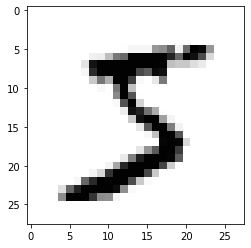

In [30]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [31]:
y_train.shape

(60000,)

In [32]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [84]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784,
                          kernel_initializer=initializer_list[0]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [86]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [87]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 256)               200960    
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dense_51 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [88]:
print(model.layers[1].get_weights())
print(model.layers[2].get_weights())

[array([[ 0.05217778,  0.03413337, -0.05171205, ...,  0.00729704,
         0.09255432, -0.06770921],
       [-0.04626923,  0.01867975, -0.00272702, ..., -0.01988805,
         0.07265829,  0.00702049],
       [-0.06142835,  0.0742547 ,  0.03290207, ..., -0.02812249,
        -0.08313984,  0.08762673],
       ...,
       [ 0.06126288,  0.04326228,  0.03190855, ...,  0.0734669 ,
         0.10810418, -0.02918848],
       [-0.04924989, -0.05877672, -0.08414415, ..., -0.04697984,
        -0.04567125, -0.02727824],
       [ 0.07930534,  0.05946774,  0.10701983, ..., -0.10612045,
         0.10118001, -0.03323991]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

model을 자유롭게 train 해봅시다.  

In [89]:
history = model.fit(x_train/255, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5721 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9138
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2086 - accuracy: 0.9368
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1775 - accuracy: 0.9462
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1554 - accuracy: 0.9527
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9580
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9621
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1119 - accuracy: 0.9653
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.100

95%이상의 성능을 가진 모델을 만들면 완성!

In [90]:
test_loss, test_acc = model.evaluate(x_test/255,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1216 - accuracy: 0.9633 - 606ms/epoch - 2ms/step

Accuracy: 0.9632999897003174


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)